#Classificando caracteres utilizando rede MLP.
Este exemplo utiliza a base de dados MNIST, que consiste em imagens de caracteres numéricos escritos à mão.

##Etapa 01
Importar as bibliotecas de aprendizado de máquina e computação científica.

In [8]:
#Bibliotecas de aprendizado de máquina
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense

#Bibliotecas de computação científica
import numpy as np
import matplotlib.pyplot as plt

##Etapa 02
Importar a base de dados MNIST do keras

Curiosidade: o Keras fornece um conjunto de base de dados para aprendizado. Veja mais em: https://keras.io/api/datasets/

In [9]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

##Etapa 03
Conhecer e plotar a base de dados

In [10]:
#Verificar a quantidade de dados para treinamento e validação
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)


x_train (60000, 28, 28)
y_train (60000,)
x_test (10000, 28, 28)
y_test (10000,)


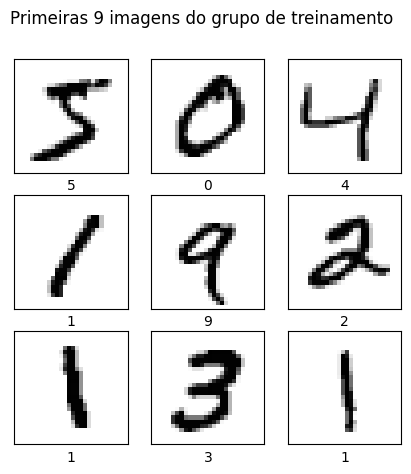

In [11]:

#Plotar imagem
plt.figure(figsize=(5,5))
plt.suptitle('Primeiras 9 imagens do grupo de treinamento')
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(y_train[i])
plt.show()

In [12]:
x_train[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

##Etapa 04
Pré-processar as imagens de forma que os valores de intensidade para os pixels fiquem entre 0 e 1.

In [14]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[0,:,:]

In [24]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

##Etapa 05
Construir a rede neural utilizando o Keras.

Primeira camada (entrada): transforma o array bidimensional (28,28) para um array unidimensional (28*28=784).

Segunda camada: Uma camada com 128 neurônios.

Terceira camada (saída): implementa uma softmax de 10 nós que retorna um array de 10 probabilidades, cuja soma resulta em 1. Cada nó contém um valor que indica a probabilidade de que aquela imagem pertença a uma das 10 classes.

In [25]:
keras.backend.clear_session()
model = Sequential()
model.add(Flatten(input_shape=(28,28))),
model.add(Dense(128, activation='relu')),
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

##Etapa 06
Compilar o modelo.

Optimizer: As opções são encontradas em https://keras.io/api/optimizers/

Loss: As opções são encontradas em https://keras.io/api/losses/

Metrics: As opções são encontradas em https://keras.io/api/metrics/

In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

##Etapa 07
Treinar o modelo e realizar a validação.

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - categorical_accuracy: 0.8777 - loss: 0.4363 - val_categorical_accuracy: 0.9615 - val_loss: 0.1361
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - categorical_accuracy: 0.9668 - loss: 0.1146 - val_categorical_accuracy: 0.9712 - val_loss: 0.1002
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - categorical_accuracy: 0.9772 - loss: 0.0759 - val_categorical_accuracy: 0.9762 - val_loss: 0.0797
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.9833 - loss: 0.0558 - val_categorical_accuracy: 0.9759 - val_loss: 0.0793
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - categorical_accuracy: 0.9871 - loss: 0.0425 - val_categorical_accuracy: 0.9769 - val_loss: 0.0739
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.9906 - loss: 0.0317 - val_categorical_accuracy: 0.9765 - val_loss: 0.0746
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy

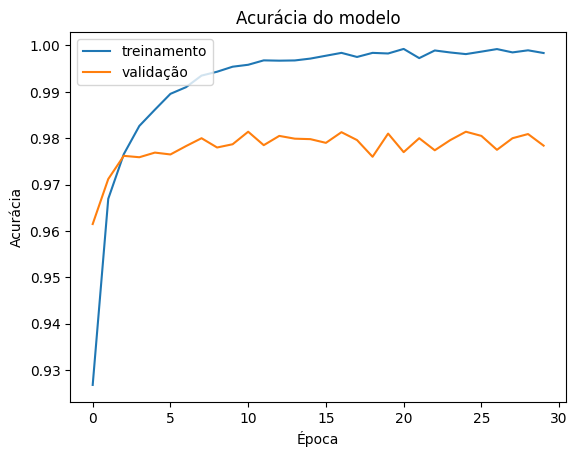

In [27]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['treinamento', 'validação'], loc='upper left')
plt.show()

##Etapa 08
Realizar algumas predições. Experimente variar a amostra (variável i).

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


TypeError: only integer scalar arrays can be converted to a scalar index

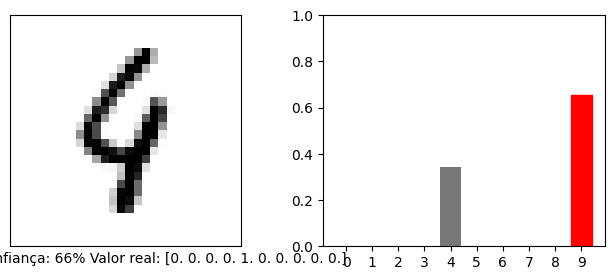

In [28]:
predictions = model.predict(x_test)
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
i =115

def plot_image(prediction_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(prediction_array)
  plt.xlabel('Predito: {} Confiança: {:2.0f}% Valor real: {}'.format(predicted_label, 100*np.max(prediction_array), true_label))

def plot_rate(prediction_array, true_label):
  plt.grid(False)
  plt.xticks(range(10), class_names)
  thisplot = plt.bar(range(10), prediction_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(prediction_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plot_image(predictions[i], y_test[i], x_test[i])
plt.subplot(1,2,2)
plot_rate(predictions[i], y_test[i])
plt.show()


##Etapa 09
Encontrar todas as predições erradas.

In [29]:
error_classification = []

for i in range(len(predictions)):
  if (np.argmax(predictions[i]) != y_test[i]):
    error_classification.append(i)

print('Total de predições erradas: ', len(error_classification))
print('Lista das predições erradas: ', error_classification)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

#Informação complementar
##Realizar a predição de uma única imagem

Na Etapa 08, realizamos a predição de todas as amostras de validação e plotamos o resultado de uma única amostra para visualização, isso porque o Keras é otimizado para trabalhar com batch (coleções) de dados. Para realizar a predição de uma única imagem, os passos abaixo são necessários.

In [ ]:
#Escolha da imagem
img_selected = 149
img = x_test[img_selected]
print(img.shape)


Como o Keras trabalha com batch, é preciso adicionar a imagem desejada em uma lista cujo único elemento seja a imagem que se deseja predizer. Para isso, basta expandir as dimensões da imagem para 3, sendo o primeiro elemento a posição na lista.

In [ ]:
#reshape
img = (np.expand_dims(img,0))
print(img.shape)

Com a única imagem na lista, é possível realizar a sua predição.

In [ ]:
value_predicted = model.predict(img)
print(value_predicted)

Por fim, encontramos a maior probabilidade e exibimos o resultado, como na Etapa 08

In [ ]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plot_image(value_predicted, y_test[img_selected], x_test[img_selected])
plt.subplot(1,2,2)
plot_rate(value_predicted[0], y_test[img_selected])
plt.show()